C:\Users\thudi\AppData\Local\Temp\ipykernel_6408\2697114524.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


Churn Rate:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


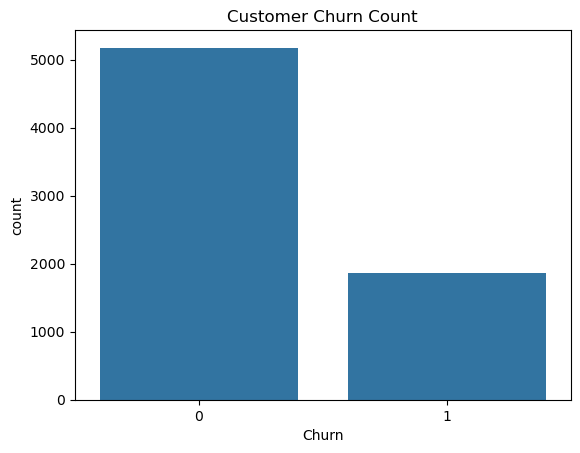

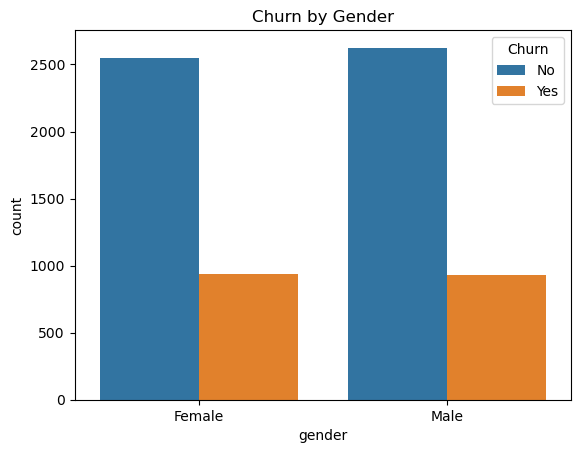

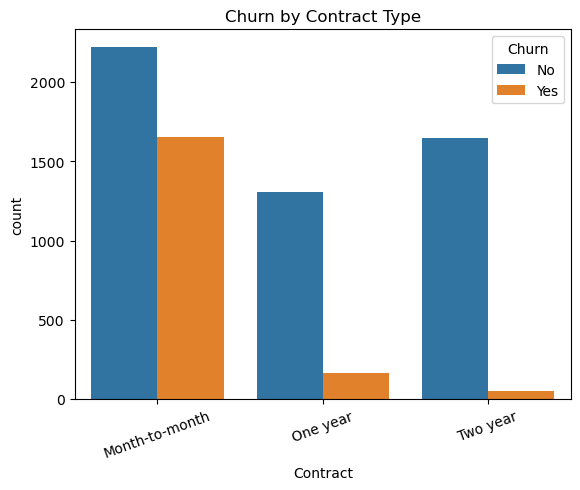

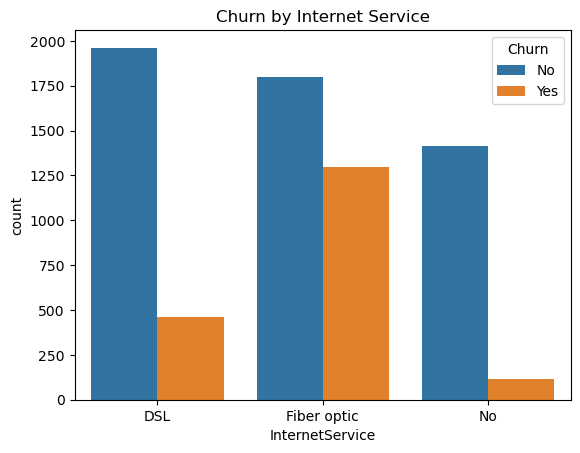

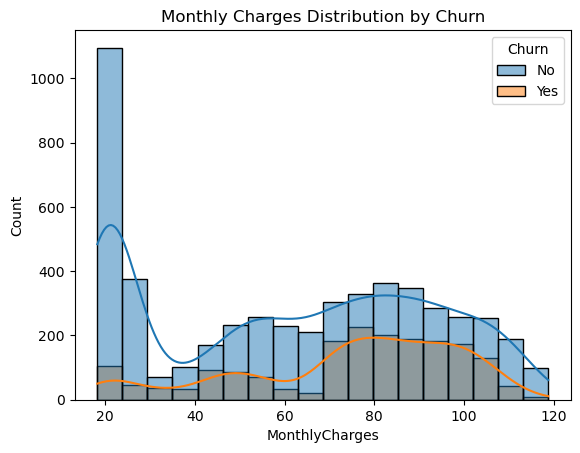

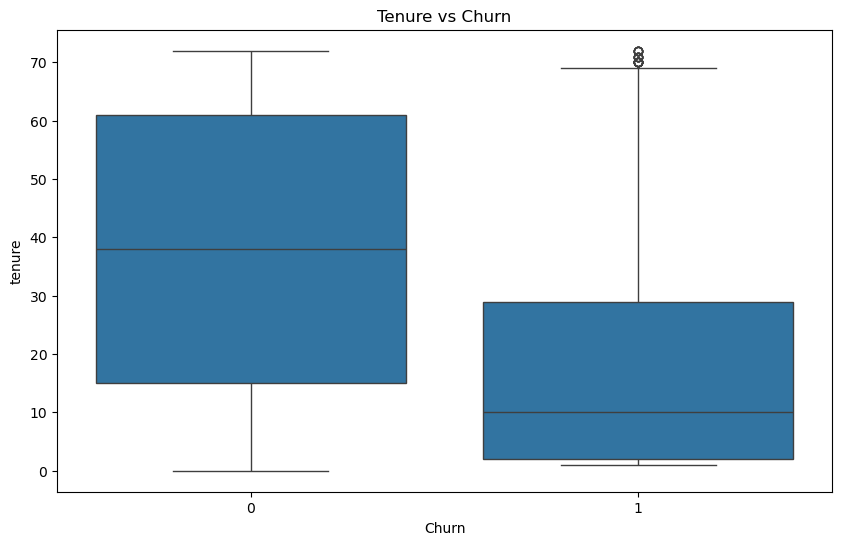

<Figure size 1200x800 with 0 Axes>

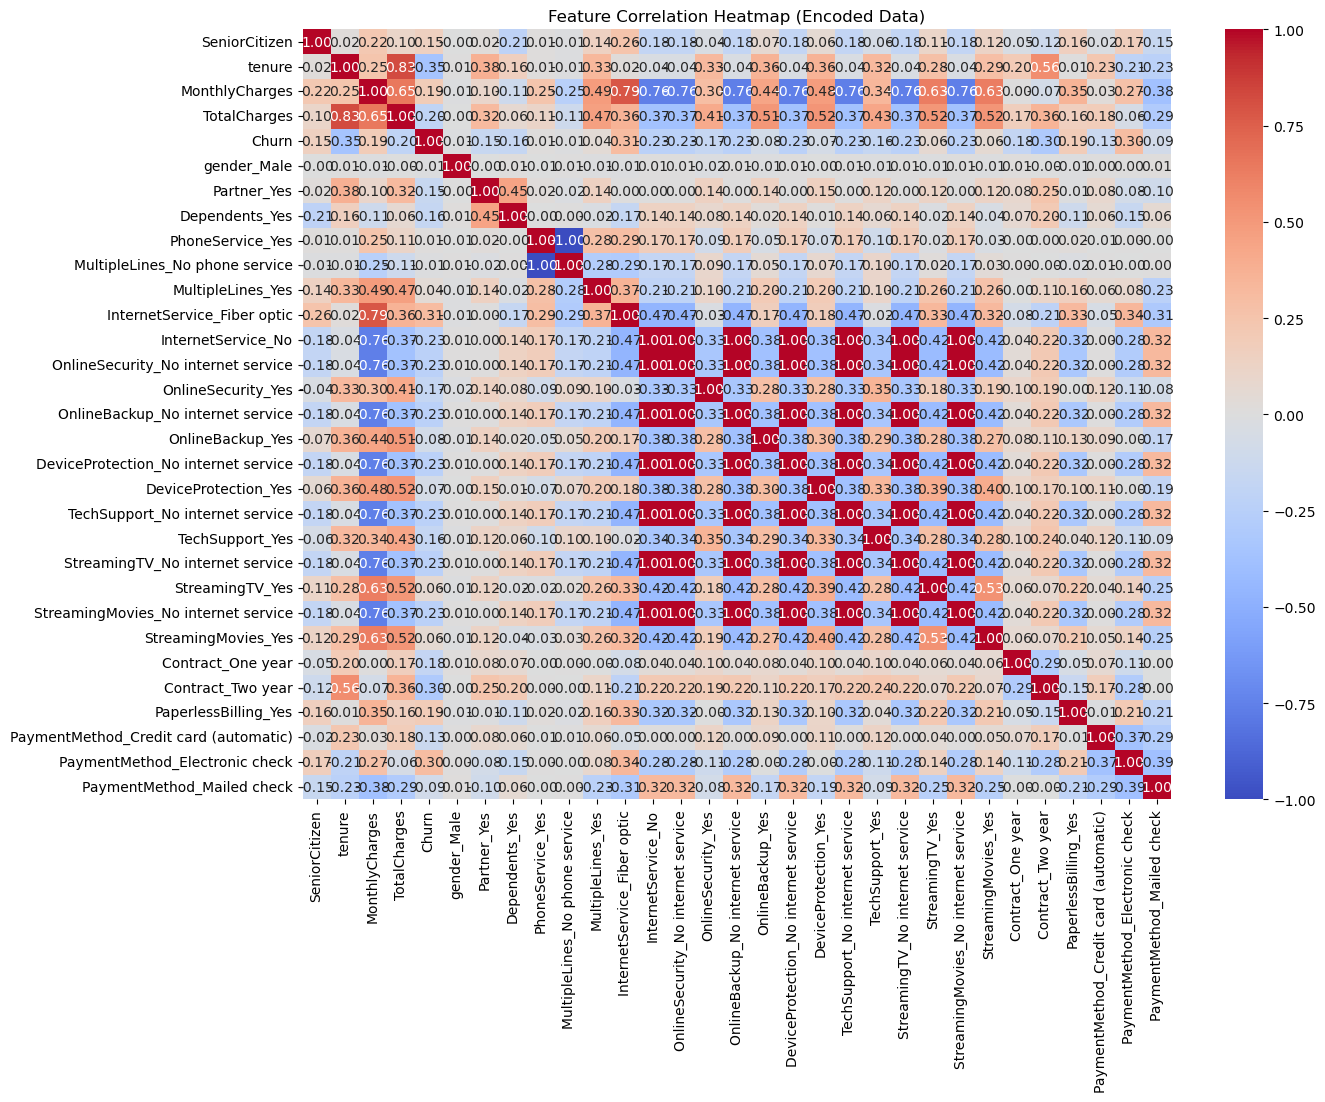

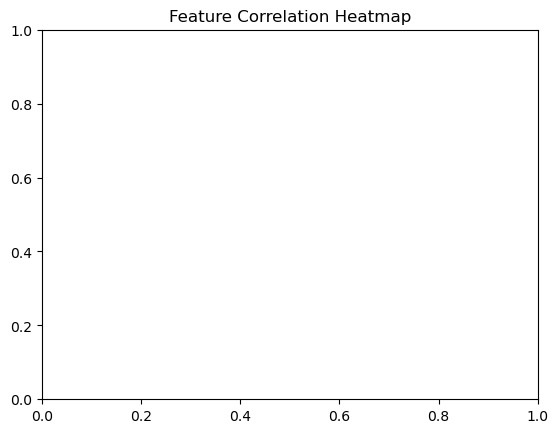

In [7]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For display settings
pd.set_option('display.max_columns', None)

# 📁 Step 2: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Keep a copy of original for plotting
df_original = df.copy()

# 🧹 Step 3: Basic Cleaning
# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, handling errors
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Fill missing values in TotalCharges with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode churn column (Yes/No → 1/0)
df["Churn"] = df["Churn"].map({'Yes': 1, 'No': 0})

# 🔍 Step 4: Basic EDA with df_original (categorical analysis)
print("Churn Rate:")
print(df["Churn"].value_counts(normalize=True))

# 📊 Step 5: Visualizations

# Churn Count
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Count")
plt.show()

# Churn by Gender
sns.countplot(x='gender', hue='Churn', data=df_original)
plt.title("Churn by Gender")
plt.show()

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df_original)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df_original)
plt.title("Churn by Internet Service")
plt.show()

# Histogram of Monthly Charges
sns.histplot(data=df_original, x="MonthlyCharges", hue="Churn", kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Encoded Data)")
plt.show()
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# Create encoded dataset for modeling
df_encoded = pd.get_dummies(df, drop_first=True)

# Save for Tableau visualization
df_original.to_csv("churn_tableau_data.csv", index=False)

# Save encoded version for modeling
df_encoded.to_csv("churn_model_ready.csv", index=False)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("churn_model_ready.csv")

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


C:\Users\thudi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC Score: 0.7505576718043206
Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

ROC AUC Score: 0.6955448362955066


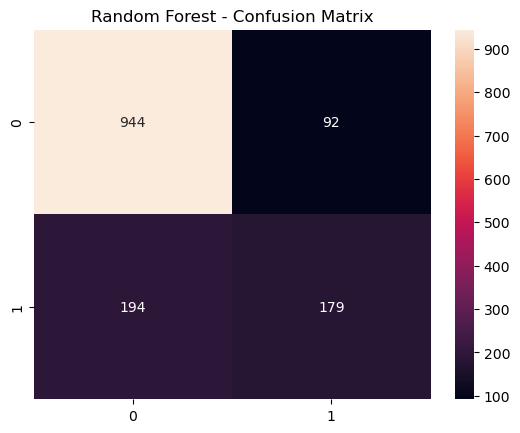

In [11]:
# Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))

# Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Random Forest - Confusion Matrix")
plt.show()


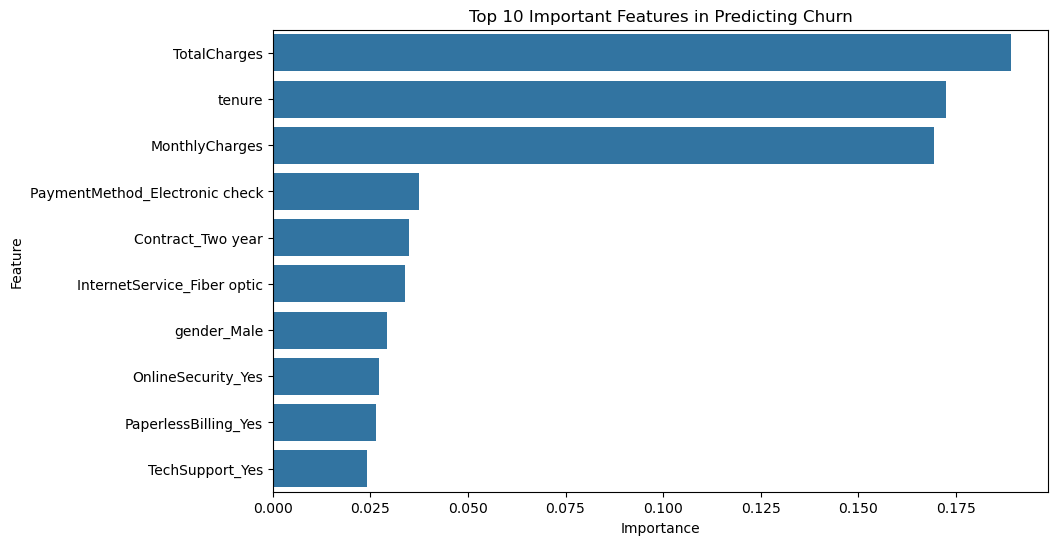

In [12]:
import numpy as np

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Important Features in Predicting Churn")
plt.show()


In [13]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

ROC AUC Score: 0.6955448362955066


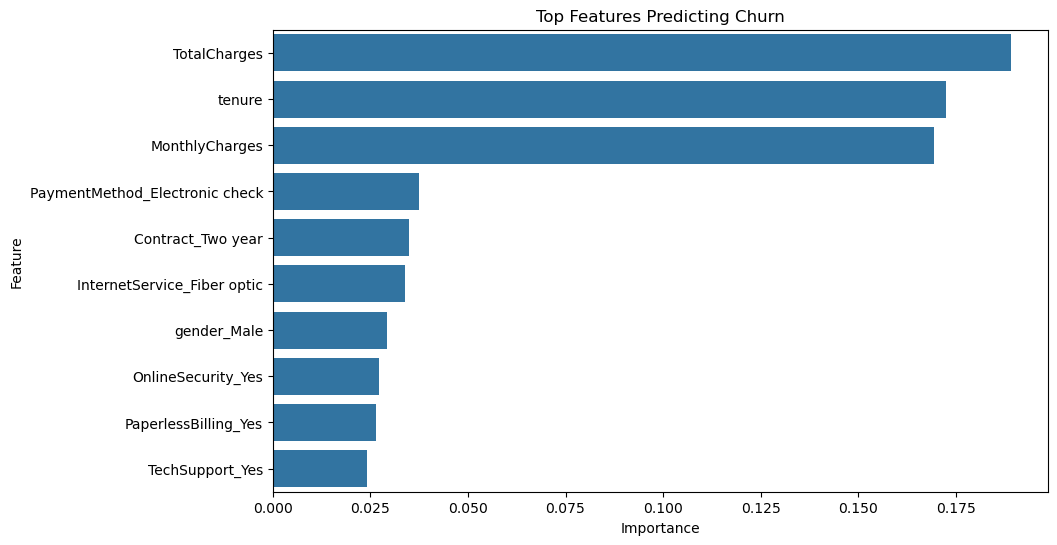

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top Features Predicting Churn")
plt.show()
